In [91]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


In [92]:
df=pd.read_csv('D:\msc3\machine learning\mushroom.csv')
print(df)


     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

In [93]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [94]:
X = df.drop(['class'], axis = 1)
Y = df['class']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

In [95]:
print(X)

[[-0.24272523 -0.02219484 -0.79620985 ... -0.40484176  4.59086996
  -0.15558197]
 [-0.24272523 -0.02219484 -0.79620985 ... -0.40484176 -0.21782364
  -0.15558197]
 [ 4.11988487 -0.02219484 -0.79620985 ... -0.40484176 -0.21782364
  -0.15558197]
 ...
 [-0.24272523 -0.02219484  1.2559503  ... -0.40484176 -0.21782364
  -0.15558197]
 [-0.24272523 -0.02219484 -0.79620985 ... -0.40484176 -0.21782364
  -0.15558197]
 [-0.24272523 -0.02219484 -0.79620985 ... -0.40484176 -0.21782364
  -0.15558197]]


In [96]:
print(Y)

[1 0 0 ... 0 1 0]


In [97]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, Y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])
print(X.shape)
print(X_lda.shape)

Original number of features: 117
Reduced number of features: 1
(8124, 117)
(8124, 1)


In [98]:
X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_lda, Y, 
                                                                        test_size = 0.30, 
                                                                        random_state = 101)

start = time.process_time()
lda = LinearDiscriminantAnalysis().fit(X_Reduced,Y_Reduced)
print('time taken:')
print(time.process_time() - start)



time taken:
0.0


In [101]:
predictionlda = lda.predict(X_Test_Reduced)
print('confusion matrix:')
print(confusion_matrix(Y_Test_Reduced,predictionlda))


confusion matrix:
[[1274    0]
 [   2 1162]]
[1 0 1 ... 0 0 1]


In [2]:
print('classification report:')
print(classification_report(Y_Test_Reduced,predictionlda))
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)

classification report:


NameError: name 'classification_report' is not defined

In [104]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['class']], axis = 1)
PCA_df['class'] = LabelEncoder().fit_transform(PCA_df['class'])
PCA_df.head()

,PC1,PC2,class
0,-3.284740,1.020129,1
1,-3.969485,-0.856876,0
2,-4.958587,-0.211117,0
3,-3.469969,0.337959,1
4,-2.726583,0.889655,0


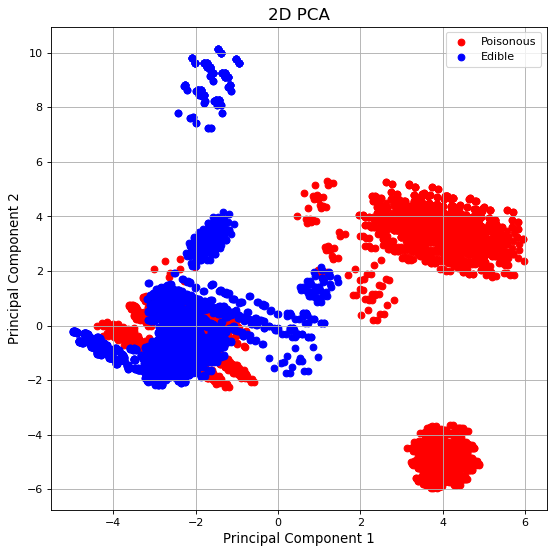

In [105]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['class'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['class'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Poisonous', 'Edible'])
plt.grid()

In [106]:
pca = PCA(n_components=3,svd_solver='full')
X_pca = pca.fit_transform(X)
print(pca.explained_variance_)

[10.31484926  9.42671062  8.35720548]


In [107]:
from sklearn.ensemble import RandomForestClassifier
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [108]:
forest_test(X_pca, Y)

3.828125
[[1262   12]
 [  40 1124]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1274
           1       0.99      0.97      0.98      1164

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

